### Project #1: MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data = pd.read_csv("Data.csv")     # Read file name Data
item = pd.read_csv("item.csv")     # Read file name item
user = pd.read_csv("user.csv")     # Read file name user

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

<p style="color:blue;">3.1 Answer for file named Data</p>

In [3]:
data.head()                     # initial information

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
data.info();                       # Information about data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
data.shape        # rows and columns of the data frame

(100000, 4)

In [6]:
data.describe()         # rating statistic information

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
data.isnull().sum().sum()    # number of missing values

0

<p style="color:blue;">3.2 Answer for file named item</p>

In [8]:
item.head()   # initial information

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
item.info()                 # Informatino about file named item

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [10]:
item.shape        # rows and columns of the data frame named item

(1681, 22)

In [11]:
item.describe()         # rating statistic information

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
item.isnull().sum().sum()    # number of missing values

0

<p style="color:blue;">3.3 Answer for file named user</p>

In [13]:
user.head()     # initial information

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
user.info()                    # information about file named: user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [15]:
print("# of users :", user['user id'].nunique())       # unique number of users
user.shape                                              # number of rows and columns file named: user

# of users : 943


(943, 5)

In [16]:
user.describe()       # statistic of file named: user

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [17]:
user.isnull().sum().sum()    # number of missing values

0

#### 4. Find the number of movies per genre using the item data - 5 marks

In [18]:
item.columns              # original columns name

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [19]:
mov_per_gen = item.drop(item.columns[0:3], axis=1).sum()          # drop the 3 first columns
mov_per_gendf = pd.DataFrame(mov_per_gen, columns = ['# of movies per genre'])    # convert a series in a dataframe
mov_per_gendf

,# of movies per genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre - 2.5 marks

In [20]:
mov_more_gen = item.set_index(item['movie id']).drop(item.columns[0:3], axis=1).sum(axis=1) # set index to movie id & drop 3 first columns
mov_more_gendf = pd.DataFrame(mov_more_gen,columns=['movies_more_than_1_genre'])  # convenrt a series as a dataframe
mov_more_gendf[mov_more_gendf['movies_more_than_1_genre']>1]     # keep movies than have more than 1 genre
#mov_more_gendf.query('movies_more_than_1_gender >1')     # keep movies than have more than 1 genre

,movies_more_than_1_genre
movie id,
1,3
2,3
4,3
5,3
7,2
...,...
1669,3
1670,2
1673,2


Response # 5: there are 849 movies id with more than one gender

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [21]:
unk_mov_gen = item.set_index(item['movie id'])  # set index to movie id
unk_mov_gen.drop(unk_mov_gen.unknown[unk_mov_gen.unknown==1], inplace=True)  # drop the movie where genre is unknown

In [22]:
unk_mov_gen.shape   # movie ids decrease by 1 from 1681 to 1680 movie id

(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [23]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

<p style="color:blue;">7.1 Rating</p>

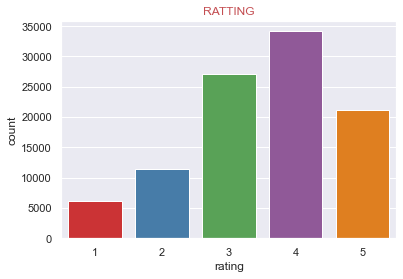

In [24]:
ax = sns.countplot(x="rating", data=data, palette="Set1")
ax.set_title("RATTING", COLOR='r');

<p style="color:blue;">7.2 Age</p>

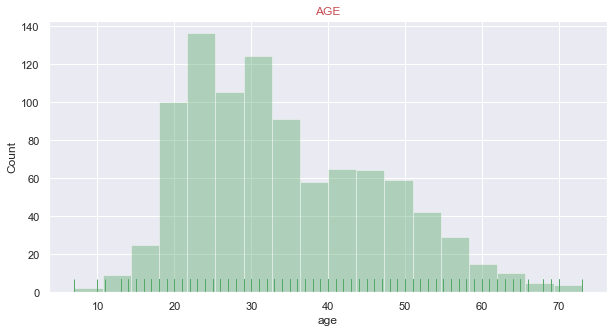

In [25]:
plt.figure(figsize=(10,5))
ax = sns.distplot(user.age, kde=False, rug=True, color ="g");
ax.set_title("AGE", COLOR='r');
ax.set_ylabel('Count');

<p style="color:blue;">7.3 Release Year</p>

In [26]:
item.head(3)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# add year column
item['Date Format'] = pd.to_datetime(item['release date'])  # add colum "Date format" 
item['year'] = item['Date Format'].dt.year                  # add year column taking year from "Date format" column
item.head(3)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Date Format,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995


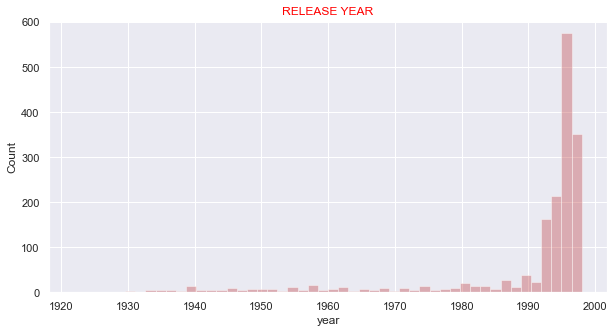

In [28]:
plt.figure(figsize=(10,5))
ax = sns.distplot(item.year, kde=False, color ="r");    # take year from item.year column
ax.set_title("RELEASE YEAR", COLOR='red');
ax.set_ylabel('Count');

<p style="color:blue;">7.4 Gender</p>

In [29]:
user.head(1)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711


In [30]:
print('Total Male in the data :',user.gender[user.gender=='M'].count())
print('Total Female in the data :',user.gender[user.gender=='F'].count())

Total Male in the data : 670
Total Female in the data : 273


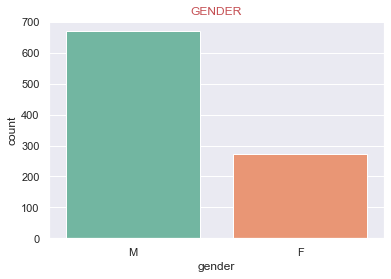

In [31]:
ax = sns.countplot(x="gender", data=user, palette="Set2")
ax.set_title("GENDER", COLOR='r');

<p style="color:blue;">7.5 Occupation</p>

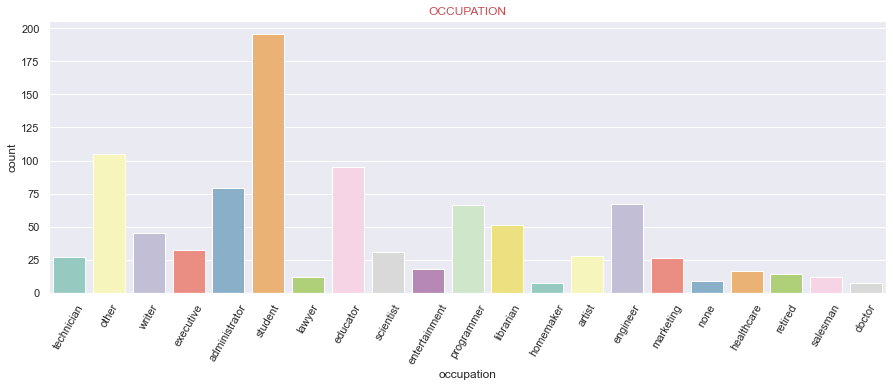

In [32]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="occupation", data=user, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60);
ax.set_title("OCCUPATION", COLOR='r');

In [33]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [34]:
#your answers here

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

In [35]:
print("item data shape :", item.shape)
item.head(3)                             # column names in item data

item data shape : (1681, 24)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Date Format,year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995


In [36]:
item.sort_values(by='year', inplace=True)           # sort values by year
year_gro = item.groupby('year').sum()             # group by years
print("Group by years :", len(year_gro),"years")  # number of years
year_gro.head(3)

Group by years : 71 years


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1542,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,617,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
year_gro.drop(year_gro.columns[0:2], axis=1, inplace=True) # drop 2 columns and keep genre movies

In [38]:
year_gro.head(3)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


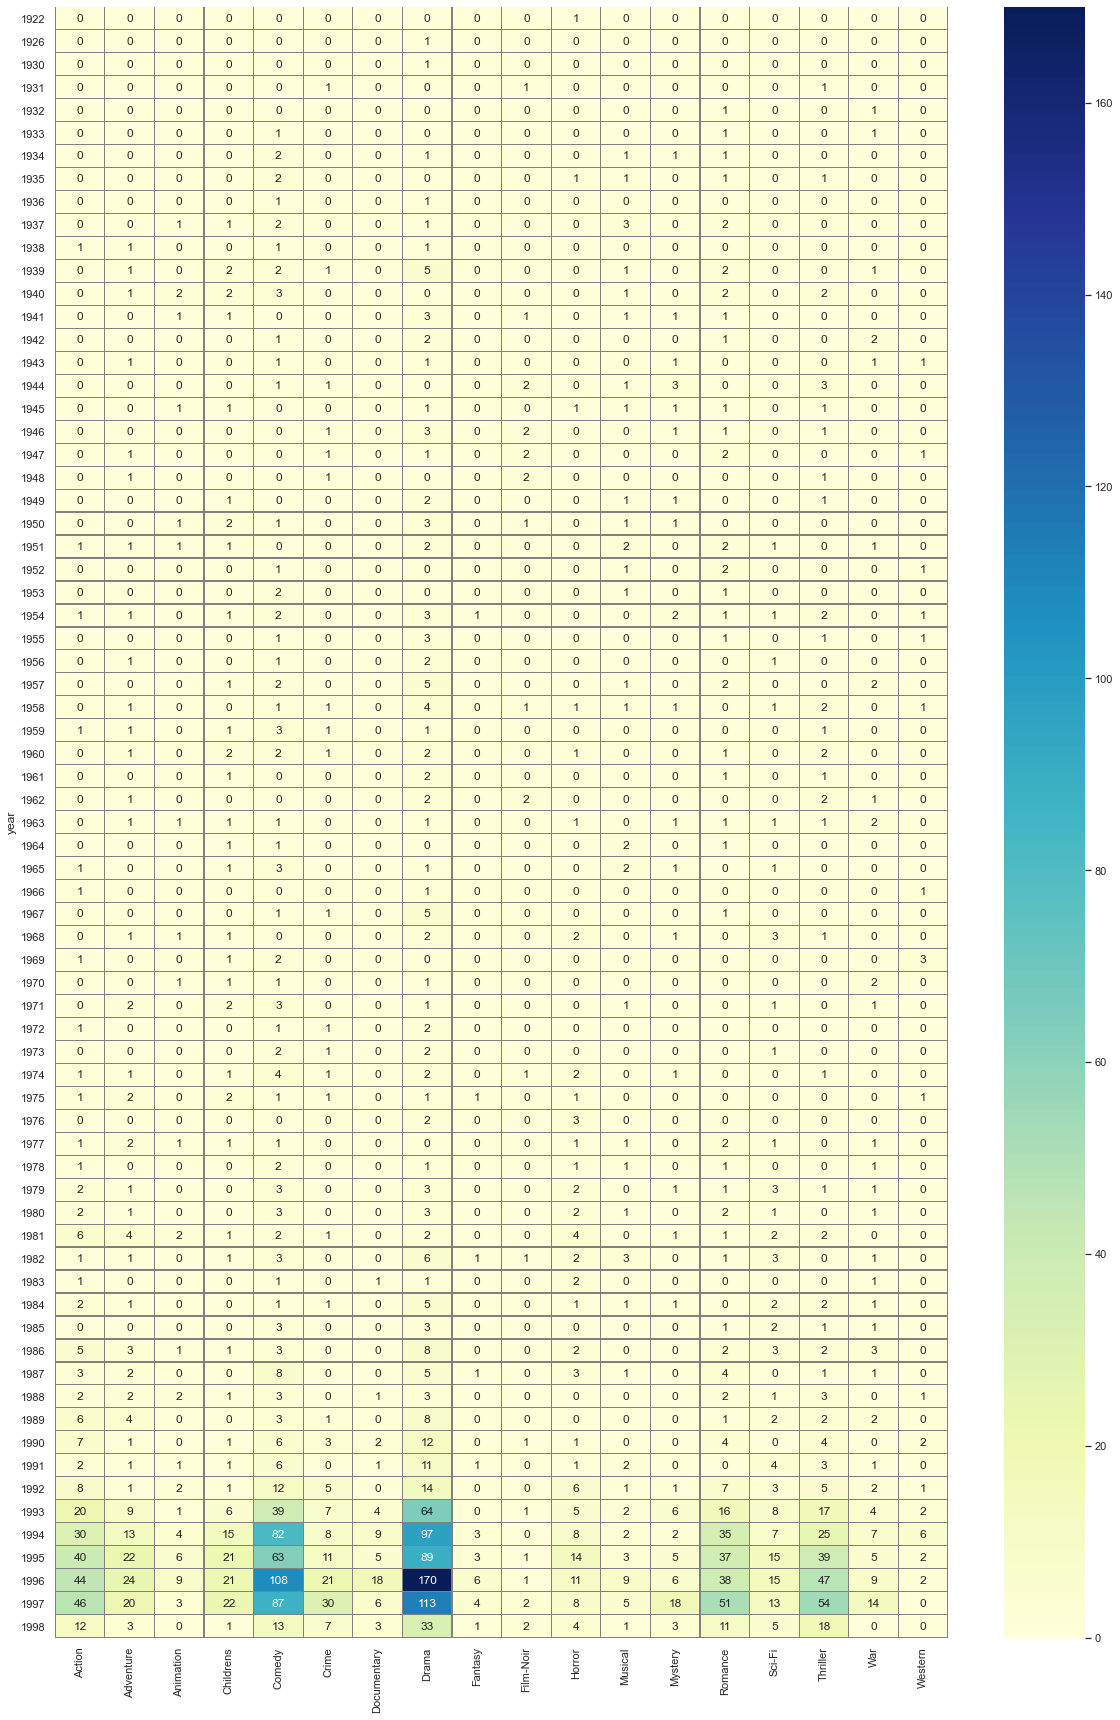

In [39]:
f, ax = plt.subplots(figsize=(20,30))
sns.heatmap(year_gro,  annot=True, fmt='d',linewidths=.2,cmap="YlGnBu", linecolor='gray',ax=ax)

<p style="color:blue;">Merging files: data & user </p>

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [40]:
#Your answer here

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [41]:
data_user = data.merge(user, how='outer',on='user id').sort_values('movie id',ascending=True)   # mergin data & user files
print("data_user shape :",data_user.shape)
data_user.head(3)                                       # new merged file has 100,000 rows and 8 columns

data_user shape : (100000, 8)


,user id,movie id,rating,timestamp,age,gender,occupation,zip code
52629,468,1,5,875280395,28,M,engineer,02341
30794,141,1,3,884584753,49,M,programmer,36117
76227,699,1,3,878882272,44,M,other,96754


In [42]:
resp9_df = data_user.groupby(by=['movie id']).agg({"movie id":["count"], "rating":["mean"]})
resp9_df

,movie id,rating
,count,mean
movie id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326
...,...,...
1678,1,1.000000
1679,1,3.000000


In [43]:
# same results that above
resp9_df = pd.DataFrame({'movie_count':data_user.groupby('movie id')['movie id'].count(), 
                           'av_rating':data_user.groupby('movie id')['rating'].mean()})

resp9_df

,movie_count,av_rating
movie id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326
...,...,...
1678,1,1.000000
1679,1,3.000000
1680,1,2.000000


In [44]:
resp9_df = resp9_df.query('movie_count >100').sort_values('av_rating',ascending=False).head(25)
resp9_df

,movie_count,av_rating
movie id,,
408,112,4.491071
318,298,4.466443
169,118,4.466102
483,243,4.456790
64,283,4.445230
603,209,4.387560
12,267,4.385768
50,583,4.358491
178,125,4.344000


In [45]:
# title of the 25 movies with highest rate and more than 100 ratings
resp9_df.join(item.set_index(item['movie id']), how='inner')[['movie title','av_rating','movie_count']]  

,movie title,av_rating,movie_count
movie id,,,
408,"Close Shave, A",4.491071,112
318,Schindler's List,4.466443,298
169,"Wrong Trousers, The",4.466102,118
483,Casablanca,4.456790,243
64,"Shawshank Redemption, The",4.445230,283
603,Rear Window,4.387560,209
12,"Usual Suspects, The",4.385768,267
50,Star Wars,4.358491,583
178,12 Angry Men,4.344000,125


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [46]:
data_user = data.merge(user, how='outer',on='user id').sort_values('movie id',ascending=True)   # mergin data & user files
print("data_user shape :",data_user.shape)  # data_user is a merged file between data & user
data_user.head(3) 

data_user shape : (100000, 8)


,user id,movie id,rating,timestamp,age,gender,occupation,zip code
52629,468,1,5,875280395,28,M,engineer,02341
30794,141,1,3,884584753,49,M,programmer,36117
76227,699,1,3,878882272,44,M,other,96754


<p style="color:blue;">10.1 User likes drama movies</p>

In [50]:
# Drama movie ids from item file
drama = item[['movie id','movie title','Drama']][item.Drama==1]
print("Number of Drama movie ids :", len(drama))

Number of Drama movie ids : 725


In [56]:
# merge the Drama movie ids "drama" with the data_user merged file
drama_gender = data_user[['movie id','user id','gender','age']].merge(drama, how='inner',on='movie id')
print("total drama_gender movies :", drama_gender.shape[0])

total drama_gender movies : 39895


In [57]:
#total user id likes drama movies
drama_gender_user = drama_gender.groupby('user id').count()
print("Total user likes drama movies :",len(drama_gender_user))

Total user likes drama movies : 943


In [63]:
drama_gender.Drama[drama_gender.Drama==1].count()

39895

In [65]:
# male that likes drama movies
#drama_male = drama_gender[drama_gender.gender=='M'].groupby('user id').gender.count() # number drama movie by male user
drama_male = drama_gender[drama_gender.gender=='M'].groupby('user id').gender.count() # number drama movie by male user

print("male likes drama movies :", len(drama_male))

male likes drama movies : 670


In [66]:
# female that likes drama movies
drama_female = drama_gender[drama_gender.gender=='F'].groupby('user id').gender.count() # number drama movie by female user
print("female likes drama movies :", len(drama_female))

female likes drama movies : 273


* from 943 user likes drama movie, 670 are men & 273 are female

<p style="color:blue;">10.2 User likes Sci-Fic movies</p>

In [67]:
# SciFi movie ids from item file
SciFi = item[['movie id','movie title']][item['Sci-Fi']==1]
print("Number of SciFi movie ids :", len(SciFi))

Number of SciFi movie ids : 101


In [68]:
# merge the Sci-Fi movie ids "Sci-Fi" with the data_user merged file
SciFi_gender = data_user[['movie id','user id','gender','age']].merge(SciFi, how='inner',on='movie id')
print("total SciFi_gender movies:", SciFi_gender.shape[0])

total SciFi_gender movies: 12730


In [69]:
#total user id likes Sci-Fi movies
SciFi_gender_user = SciFi_gender.groupby('user id').count()
print("Total user likes SciFi movies :",len(SciFi_gender_user))

Total user likes SciFi movies : 908


In [73]:
# male that likes SciFi movies
SciFi_male = SciFi_gender[SciFi_gender.gender=='M'].groupby('user id').gender.count() # number drama movie by male user
print("male likes SciFi movies :", len(SciFi_male))

male likes SciFi movies : 652


In [74]:
# female that likes SciFi movies
SciFi_female = SciFi_gender[SciFi_gender.gender=='F'].groupby('user id').gender.count() # number drama movie by female user
print("female likes SciFi movies :", len(SciFi_female))

female likes SciFi movies : 256


* from 908 user likes Sci-Fi movies, 652 are men & 256 are female

<p style="color:blue;">10.3 User likes Romance movies</p>

In [75]:
# Romance movie ids from item file
Romance = item[['movie id','movie title']][item.Romance==1]
print("Number of Romance movie ids :", len(Romance))

Number of Romance movie ids : 247


In [76]:
# merge the Romance movie ids "Romance" with the data_user merged file
Romance_gender = data_user[['movie id','user id','gender','age']].merge(Romance, how='inner',on='movie id')
print("total Romance_gender movies:", Romance_gender.shape[0])

total Romance_gender movies: 19461


In [77]:
#total user id likes Romance movies
Romance_gender_user = Romance_gender.groupby('user id').count()
print("Total user likes Romance movies :",len(Romance_gender_user))

Total user likes Romance movies : 943


In [110]:
# male that likes Romance movies
Romance_male = Romance_gender[Romance_gender.gender=='M'].groupby('user id').gender.count() # number drama movie by male user
print("male likes Romance movies :", len(Romance_male))
#Romance_male

male likes Romance movies : 670


In [112]:
# female that likes Romance movies
Romance_female = Romance_gender[Romance_gender.gender=='F'].groupby('user id').gender.count() # number drama movie by female user
print("female likes Romance movies :", len(Romance_female))
#Romance_female.sum()

female likes Romance movies : 273


* from 943 user likes Romance movies, 670 are men & 273 are female

# Additional Analysis

In [80]:
data.columns

Index(['user id', 'movie id', 'rating', 'timestamp'], dtype='object')

In [81]:
# Summary from the 3 initial files: data, item, user
summary = pd.DataFrame([data.columns, user.columns, item.columns]).T.fillna(value = '-')  # fill empty spaces
summary.rename(columns={0: "total data", 1: "user id",2: "movie id"})         # rename columns

,total data,user id,movie id
0,user id,user id,movie id
1,movie id,age,movie title
2,rating,gender,release date
3,timestamp,occupation,unknown
4,-,zip code,Action
5,-,-,Adventure
6,-,-,Animation
7,-,-,Childrens
8,-,-,Comedy
9,-,-,Crime


In [82]:
# merging the 3 files in one file
merged = data.merge(user, how='outer', on='user id').merge(item, how='outer', on ='movie id', sort=True)
merged.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie title', 'release date', 'unknown',
       'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'Date Format', 'year'],
      dtype='object')

<p style="color:blue;">11.1 Who are the best 10 clients and what movies do they like it? </p>

In [83]:
becl = merged.groupby('user id')['movie id'].count().sort_values(ascending=False).head(10)
becl

user id
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
Name: movie id, dtype: int64

In [84]:
best_user_list = []
for bc in becl.index:
    data_user = user.loc[user['user id'] == bc]    # it is a series from dataframe
    best_user_list.append(data_user)               # append series data
    best_users = pd.concat(best_user_list)        # concatenate series into dataframe
        
best_users.reset_index().drop(columns='index')


,user id,age,gender,occupation,zip code
0,405,22,F,healthcare,10019
1,655,50,F,healthcare,60657
2,13,47,M,educator,29206
3,450,35,F,educator,11758
4,276,21,M,student,95064
5,416,20,F,student,92626
6,537,36,M,engineer,22902
7,303,19,M,student,14853
8,234,60,M,retired,94702
9,393,19,M,student,83686


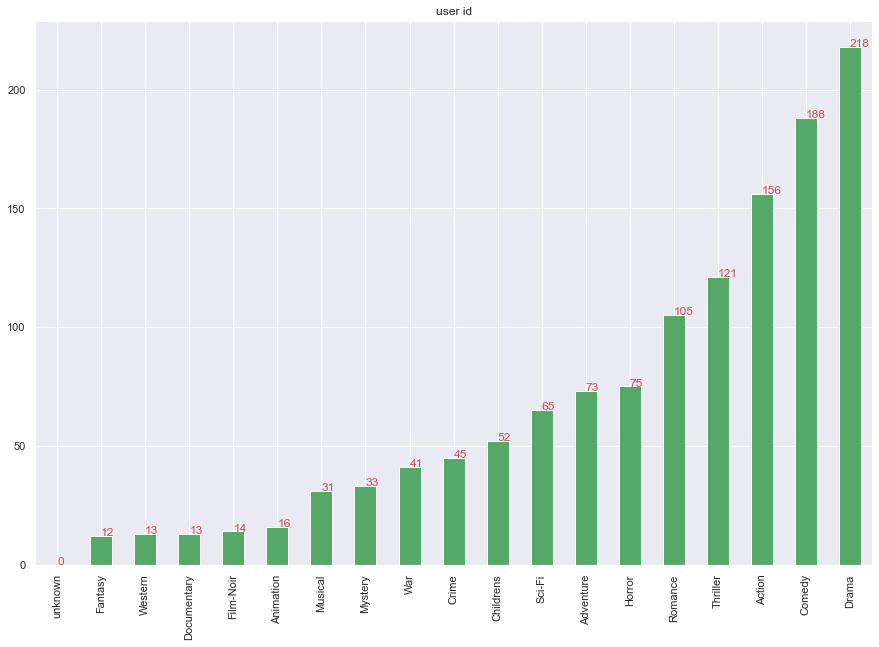

In [85]:
# type of movies by user
xxid = merged.loc[merged['user id'] == 13].iloc[:,10:-2].sum().sort_values()
xxid.plot(kind='bar', title='user id', color='g', figsize=(15,10))
for i, v in enumerate(xxid):
    plt.text(i, v, int(v),color='r')

<p style="color:blue;">12.- What is the busy time during the month and week? </p>

In [86]:
# using the merged file add month and week columns
merged['Date Format'] = pd.to_datetime(merged['release date'])
merged['month'] = merged['Date Format'].dt.month            # add month column taking year from "Date format" column
merged['weekday'] = merged['Date Format'].dt.weekday
#merged.drop(columns='timestamp')                    # Drop columns
merged.tail()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Date Format,year,month,weekday
99995,863,1678,1,889289570,17,M,student,60089,Mat' i syn,06-Feb-1998,...,0.0,0.0,0.0,0.0,0.0,0.0,1998-02-06,1998.0,2.0,4.0
99996,863,1679,3,889289491,17,M,student,60089,B. Monkey,06-Feb-1998,...,0.0,1.0,0.0,1.0,0.0,0.0,1998-02-06,1998.0,2.0,4.0
99997,863,1680,2,889289570,17,M,student,60089,Sliding Doors,01-Jan-1998,...,0.0,1.0,0.0,0.0,0.0,0.0,1998-01-01,1998.0,1.0,3.0
99998,896,1681,3,887160722,28,M,writer,91505,You So Crazy,01-Jan-1994,...,0.0,0.0,0.0,0.0,0.0,0.0,1994-01-01,1994.0,1.0,5.0
99999,916,1682,3,880845755,27,M,engineer,N2L5N,Scream of Stone (Schrei aus Stein),08-Mar-1996,...,0.0,0.0,0.0,0.0,0.0,0.0,1996-03-08,1996.0,3.0,4.0


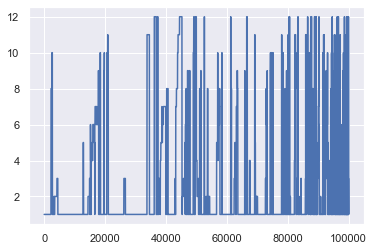

In [87]:
merged.month.plot(kind='line')

<p style="color:blue;">13.- Using Gadgets choose any combinatino from summary table? </p>

In [88]:
output = widgets.Output()

In [89]:
merged.select_dtypes('number').columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'age', 'unknown',
       'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'year',
       'month', 'weekday'],
      dtype='object')

In [90]:
merged.select_dtypes('object').columns

Index(['gender', 'occupation', 'zip code', 'movie title', 'release date'], dtype='object')

In [91]:
merged.select_dtypes('datetime').columns

Index(['Date Format'], dtype='object')

In [92]:
@interact
def groupby(column=['Action','Comedy','Drama']):
    
    grouped = merged.groupby(by=column)['age'].agg(['mean','count'])
    
    return grouped

interactive(children=(Dropdown(description='column', options=('Action', 'Comedy', 'Drama'), value='Action'), O…

In [93]:
@interact
def groupby(column=merged.select_dtypes('number').columns):
    
    grouped = merged.groupby(by=column)['year'].agg(['count'])
    
    return grouped

interactive(children=(Dropdown(description='column', options=('user id', 'movie id', 'rating', 'timestamp', 'a…

In [94]:
@interact
def groupby(column=merged.select_dtypes('object').columns):
    
    grouped = merged.groupby(by=column)['gender'].agg(['count'])
    
    return grouped

interactive(children=(Dropdown(description='column', options=('gender', 'occupation', 'zip code', 'movie title…

In [95]:
@interact_manual
def groupby(column=merged.select_dtypes('number').columns):
    
    grouped = merged.groupby(by=column)['age'].agg(['mean','count'])
    
    return grouped

interactive(children=(Dropdown(description='column', options=('user id', 'movie id', 'rating', 'timestamp', 'a…

In [96]:
from IPython.display import display
from IPython.display import clear_output

In [97]:
#num_columns = widgets.Dropdown(options=merged.select_dtypes('number').columns)
movie_type = widgets.Dropdown(options=merged.iloc[:,11:-4].columns)
#str_columns = widgets.Dropdown(options=merged.select_dtypes('object').columns)
user_info = widgets.Dropdown(options=merged.iloc[:,4:7].columns)
#date_columns = widgets.Dropdown(options=merged.select_dtypes('datetime').columns)
movie_time = widgets.Dropdown(options=merged.iloc[:,-3:].columns)

In [98]:
merged.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip code', 'movie title', 'release date', 'unknown',
       'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'Date Format', 'year', 'month', 'weekday'],
      dtype='object')

In [99]:
input_widgets = widgets.HBox(
    [user_info, movie_time, movie_type])

In [100]:
def group_by(obj):
    global grouped
    #grouped = merged.groupby(by=user_info.value).agg({movie_type.value:["sum"]})
    grouped = merged.groupby([user_info.value ,movie_time.value]).agg({movie_type.value:["sum"]})
    #grouped = merged.groupby(by=user_info.value and movie_time.value)[movie_type.value].agg(["sum"])
    with output:
        clear_output(True)
        display(grouped)

In [101]:
display(input_widgets)

In [102]:
btn = widgets.Button(description='Show Table')
btn.on_click(group_by)
display(btn)

Button(description='Show Table', style=ButtonStyle())

In [103]:
output = widgets.Output()
display(output)

Output()

In [104]:
def group_chart(obj):
    global grouped2
    plot_output = widgets.Output()
    plot_output.clear_output()
    grouped2 = merged.groupby([user_info.value ,movie_time.value]).agg({movie_type.value:["sum"]})
    #grouped2 = merged.groupby([user_info.value])[movie_type.value]
    cha = pd.pivot_table(grouped2,
              index=[user_info.value],
              columns=[movie_time.value],
              values=[movie_type.value],
              aggfunc=['sum'])
    with plot_output:
        #clear_output(True)
        #print(grouped2)
        f, ax = plt.subplots(figsize=(15,30))
        sns.heatmap(cha,  annot=True, fmt='g',linewidths=.2,cmap="YlGnBu", linecolor='gray',ax=ax)
        plt.show
        #display(ax)

In [105]:
btn = widgets.Button(description='Show Chart')
btn.on_click(group_chart)
display(btn)

Button(description='Show Chart', style=ButtonStyle())

In [106]:
plot_output = widgets.Output()
display(plot_output)

Output()

In [107]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

def colour_ge_value(value, comparison):
    if value >= comparison:
        return 'color: red'
    else:
        return 'color: black'

In [108]:
output = widgets.Output()
plot_output = widgets.Output()

dropdown_year = widgets.Dropdown(options = unique_sorted_values_plus_ALL(merged.year), description='Year:')
dropdown_purpose = widgets.Dropdown(options = unique_sorted_values_plus_ALL(merged.occupation), description='Occupation:')
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5, step=1, description='Number:')


def common_filtering(year, occupation, num):
    output.clear_output()
    plot_output.clear_output()
    
    if(year ==ALL) & (occupation == ALL):
        common_filter = merged
    elif (year ==ALL):
        common_filter = merged[merged.occupation == occupation]
    elif (occupation == ALL):
        common_filter = merged[merged.year == year]
    else:
        common_filter = merged[(merged.year == year) & (merged.occupation == occupation)]
        
    with output:
        display(common_filter.style.applymap(lambda x: colour_ge_value(x, num), subset=['age']))

    with plot_output:
        sns.kdeplot(common_filter['age'],shade=True)
        plt.show()
        
def dropdown_year_eventhandler(change):
    common_filtering(change.new, dropdown_purpose.value, bounded_num.value)
            
def dropdown_purpose_eventhandler(change):
    common_filtering(dropdown_year.value, change.new, bounded_num.value)

def dropdown_num_eventhandler(change):
    common_filtering(dropdown_year.value, dropdown_purpose.value, change.new)
    
dropdown_year.observe(dropdown_year_eventhandler, names='value')
dropdown_purpose.observe(dropdown_purpose_eventhandler, names='value')
bounded_num.observe(dropdown_num_eventhandler, names='value')

item_layout = widgets.Layout(margin='0 0 50px 0')

input_widgets = widgets.HBox([dropdown_year, dropdown_purpose, bounded_num],
                            layout=item_layout)

tab = widgets.Tab([output, plot_output], layout=item_layout)
tab.set_title(0, 'Data Exploration')
tab.set_title(1, 'KDE Plot')



In [109]:
dashboard = widgets.VBox([input_widgets, tab])
display(dashboard)